# Linear correlation

Correlation coefficient measures the strength of linear relationship between two variables. Its value always ranges between -1 and +1. A positive correlation indicates that the two variables are directly related i.e. when the value of one increases, the value of the other increases also. A negative coefficient indicates that the variables are inversely related. The closer to 0, the weaker the relationship between two variables is.

Mathematically, the correlation coefficient of 2 series X and Y is defined as:

$$ r = \frac{Cov(X,Y)}{\sigma_X \sigma_Y} $$

Two random datasets will have a correlation coefficient close to 0.

### Correlation vs. Covariance

Covariance is the expected value of the product of the deviations of the two random variables from their respective expected values.

$$ Cov(R_i,R_j) = E[[R_i - E(R_i)][R_j - E(R_j)]] $$

$$ Cov(R_i,R_j) = E(R_i,R_j) - E(R_i) \times E(R_j) $$

1. If X and Y are independent random variables, then: 
$$Cov(X,Y) = 0 $$
2. The covariance of random variable X with itself is the variance of X:
$$Cov(X,X) = Var(X) $$
3. If a, b, c and d are constants, then:
$$Cov(a + bX, c + dY) = b \times d \times Cov(X,Y) $$
4. If X and Y are not independent then:
$$ Var(X + Y) = Var(X) + Var(Y) + 2Cov(X,Y) $$
$$ Var(X - Y) = Var(X) + Var(Y) - 2Cov(X,Y) $$

Correlation is simply a normalized form of covariance. Covariance is not that meaningful in itself: it can take on extremely large values ranging from negative to positive infinity and like the variance it is expressed in terms of squared units.

Some properties of correlation:
1. Correlation has not units.
2. If correlation = 1, the random variables have perfect positive correlation. This means a movement in one random variable results in a proportional positive movement in the other relative to its mean (and inversely for -1).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,5)

In [2]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

0.1720913096590848

In [4]:
X = np.random.rand(50)
Y = 2 * X + 4

print('Covariance of X and Y: \n' + str(np.cov(X, Y)))
print('Correlation of X and Y: \n' + str(np.corrcoef(X, Y)))

Covariance of X and Y: 
[[0.07288389 0.14576778]
 [0.14576778 0.29153556]]
Correlation of X and Y: 
[[1. 1.]
 [1. 1.]]


`np.cov` and `np.corrcoef` return matrices. The covariance matrix is an important concept in statistics. For each input variable we have one row and one column. The diagonal is just the variance of that variable i.e. $Cov(X,Y)$ and entries off the diagonal are covariances between different variables. The matrix is symmetric across the diagonal.

Let's simulate two completely random sets of data:

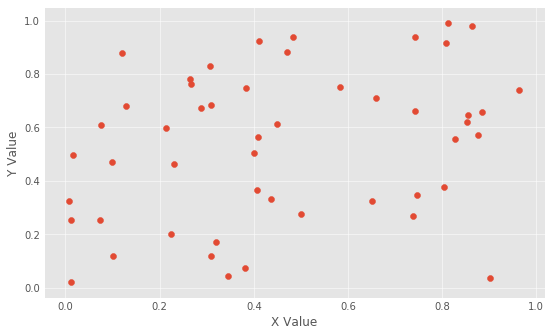

Correlation: 0.29034123503811954
Built-in Correlation: 0.28453441033735716


In [18]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()

# taking the relevant value from the matrix returned by np.cov
print('Correlation: ' + str(np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y))))
# Let's also use the builtin correlation function
print('Built-in Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

And now for two correlated data sets:

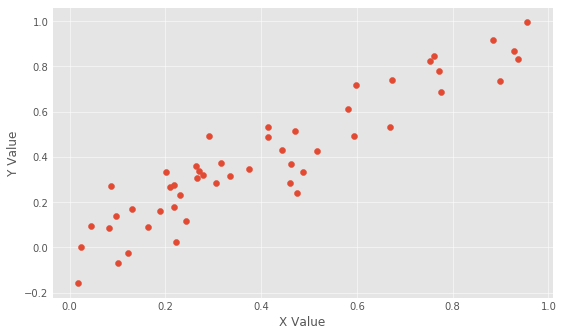

Correlation: 0.9309670149301907


In [23]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

We can dial down the correlation by introducing a bit more noise:

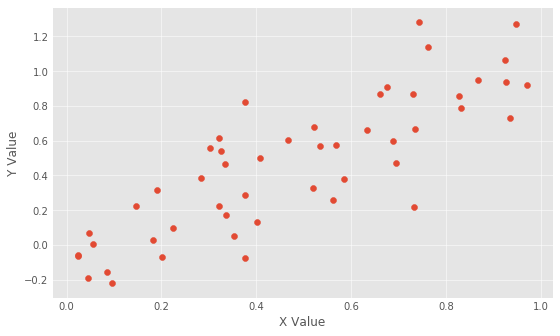

Correlation: 0.834540531555896


In [21]:
X = np.random.rand(50)
Y = X + np.random.normal(0, .2, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

For an inverse relationship:

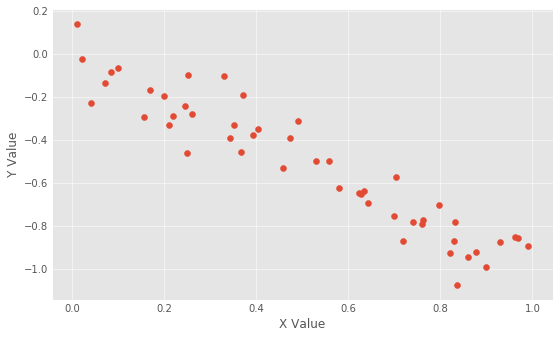

Correlation: -0.9449632184767858


In [22]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

With real world data:

In [24]:
import pandas_datareader as pdr

In [25]:
pdr.get_data_yahoo?

In [55]:
start = '2019-02-01'
end = '2019-06-01'

bench = pdr.get_data_yahoo('^FCHI', start=start, end=end)['Close']
a1 = pdr.get_data_yahoo('GLE.PA', start=start, end=end)['Close']
a2 = pdr.get_data_yahoo('BNP.PA', start=start, end=end)['Close']

Correlation coefficients
GLE and BNP:  0.7284671608672673
GLE and CAC:  0.6351756975207403
BNP and CAC:  0.8810377735411102


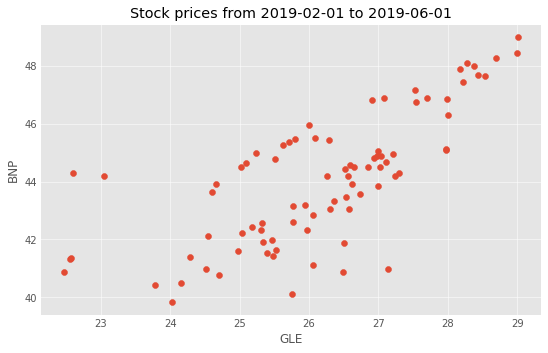

In [56]:
plt.scatter(a1,a2)
plt.xlabel('GLE')
plt.ylabel('BNP')
plt.title('Stock prices from ' + start + ' to ' + end)
print("Correlation coefficients")
print("GLE and BNP: ", np.corrcoef(a1,a2)[0,1])
print("GLE and CAC: ", np.corrcoef(a1,bench)[0,1])
print("BNP and CAC: ", np.corrcoef(bench,a2)[0,1])
plt.show()

### Limitations

#### Significance

It is hard to determine if correlation is significant or not, especially when the variables are not normally distributed. We see that the two stocks are correlated over the time period we use but is this indicative of future correlation? One fundamental problem is that it is easy to datamine correlations by picking the right time period. To avoid this, we can compute the correlation of two quantities over many historical time periods and study the distribution of the correlation coefficient. 

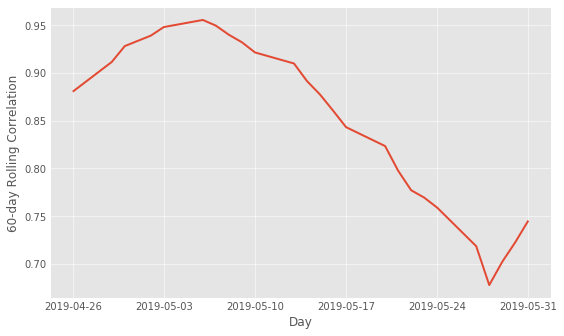

In [58]:
rolling_correlation = a1.rolling(window=60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')
plt.show()

### Nonlinear relationships

The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it's important to remember that two variables may be associated in different, predictable ways which this analysis would not pick up. For instance, one variable might precisely follow the behavior of a second, but with a delay. There are techniques for dealing with this lagged correlation. Alternatively, a variable may be related to the rate of change of another. Neither of these relationships are linear, but can be very useful if detected.